# 5. Clustering (군집)
- 군집 (Clustering)은 데이터 셋을 클러스터 (Cluster)라는 그룹으로 나누는 작업
- 한 클러스터 안의 데이터 포인트끼리는 매우 비슷하고 다른 클러스터의 데이터 포인트와는 구분되도록 데이터를 나누는 것이 목표
- 분류 알고리즘과 비슷하게 군집 알고리즘은 각 데이터 포인트가 어느 클러스터에 속하는지 할당 (또는 예측)

## 5-1. k-평균 군집
- k-평균 (k-means) 군집은 가장 간단하고 또 널리 사용하는 군집 알고리즘
- 이 알고리즘은 데이터의 어떤 영역을 대표하는 클러스터 중심 (Cluster Center)을 찾음
- 알고리즘은 두 단계를 반복. 먼저 데이터 포인트를 가장 가까운 클러스터 중심에 할당하고, 클러스터에 할당된 데이터 포인트의 평균으로 클러스터 중심을 다시 지정
- 클러스터에 할당되는 데이터 포인트에 변화가 없을 때 알고리즘이 종료됨

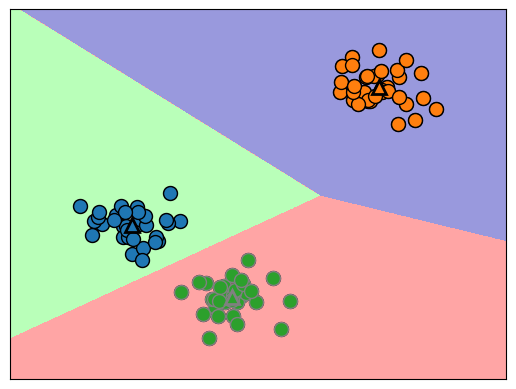

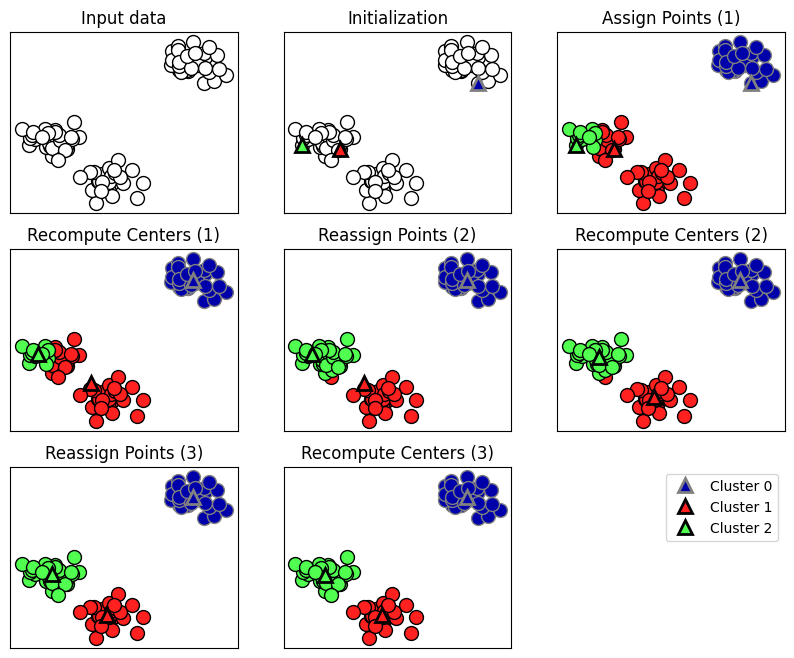

In [7]:
# 예시용 데이터셋에 k-평균 군집을 적용한 예
import mglearn

%matplotlib inline

mglearn.plots.plot_kmeans_algorithm()

- 삼각형은 클러스터 중심이고 원은 데이터 포인트. 클러스터는 색으로 구분
- 3개의 클러스터를 찾도록 지정했으니 알고리즘이 클러스터 중심으로 삼을 데이터 포인트 3개를 무작위로 초기화했음 (그림의 "초기화")
- 그 다음 알고리즘이 반복됨. 먼저 각 데이터 포인트를 가장 가까운 클러스터 중심에 할당 (그림의 "포인트 할당 (1)")
- 다음엔 할당한 포인트의 평균값으로 클러스터 중심을 갱신 (그림의 "중심 재계산 (1)")
- 이렇게 같은 과정을 두 번 더 반복. 세 번 반복한 후에 클러스터 중심에 할당되는 포인트에 변화가 없으므로 알고리즘이 멈춤
- 새로운 데이터 포인트가 주어지면 k-평균 알고리즘은 가장 가까운 클러스터 중심을 할당

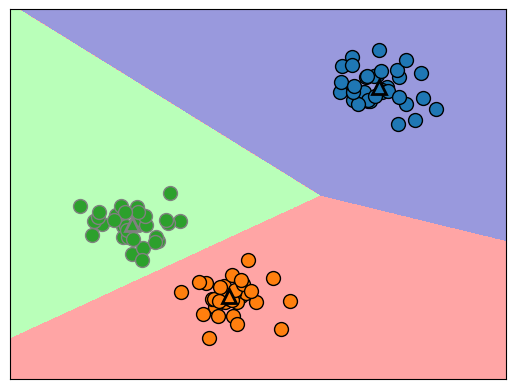

In [8]:
# 학습시킨 클러스터 중심의 경계
mglearn.plots.plot_kmeans_boundaries()

- scikit-learn에서 k-평균 알고리즘을 사용하는 것도 다른 알고리즘과 비슷
- 여기서는 앞에서 사용한 인위적 데이터셋에 적용
- KMeans의 객체를 생성하고 찾고자 하는 클러스터의 수를 지정하고, 다음 fit 메서드를 호출

In [9]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 인위적으로 2차원 데이터를 생성
X, y = make_blobs(random_state=1)

# 군집 모델을 만듦
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [10]:
# 알고리즘을 적용하면 X에 담긴 각 훈련 데이터 포인트에 클러스터 레이블이 할당
# kmeans.labels_ 속성에서 이 레이블을 확인할 수 있음
print("클러스터 레이블:\n{}".format(kmeans.labels_))

클러스터 레이블:
[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


- 세 개의 클러스터를 지정했으므로 각 클러스터는 0에서 2까지의 번호가 붙음
- 또 predict 메서드를 사용해 새로운 데이터의 클러스터 레이블을 예측할 수 있음
- 예측은 각 포인트에 가장 가까운 클러스터 중심을 할당하는 것이며 기존 모델을 변경하지 않음
- 훈련 세트에 대해 predict 메서드를 실행하면 labels_와 같은 결과를 얻게 됨

In [11]:
print(kmeans.predict(X))

[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


- 군집은 각 데이터 포인트가 레이블을 가진다는 면에서 분류와 조금 비슷해 보임
- 그러나 정답을 모르고 있으며 레이블 자체에 어떤 의미가 있지는 않음
- 앞서 이야기한 얼굴 이미지를 군집시키는 예에서, 알고리즘이 찾은 클러스터 3에는 한 친구의 얼굴만 담겨 있을 수 있음
- 하지만 이는 사진들을 직접 봐야 알 수 있으며 숫자 3은 아무런 의미가 없음
- 알고리즘이 우리에게 주는 정보는 3이라고 레이블 된 얼굴들은 모두 서로 비슷하다는 것
- 2차원 예제 데이터에서 군집 알고리즘을 적용할 때 한 그룹의 레이블은 0으로, 다른 그룹은 1로 지정되는 것은 중요하지 않음
- 초기화를 무작위로 하기 때문에 알고리즘을 다시 실행하면 클러스터의 번호가 다르게 부여될 수 있음

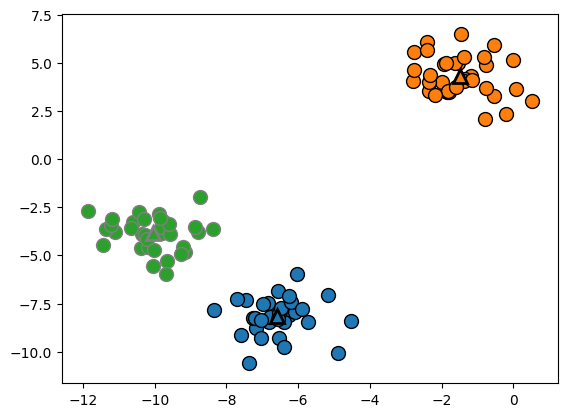

In [12]:
# cluster_centers_ 속성에 저장된 클러스터 중심을 삼각형으로 표시
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2], markers='^', markeredgewidth=2);